### Python module/package imports for this chapter

In [1]:
import os, sys, collections, re, json, io, base64

In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim
# from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [3]:
import requests
import bs4      # BeautifulSoup 4

In [4]:
import IPython.display
import PIL, PIL.Image, PIL.ImageOps, PIL.ImageEnhance  # Python Imaging Library - now "pillow"

### Data needed from previous videos

In [5]:
imgurl = "http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FRB_527107895EDR_F0572798FHAZ00337M_.jpg"

# if internet is not available or NASA's webserver is unresponsive,
# the images used below are available in the exercise files, and
# they can be loaded into Pillow with
# imgright = PIL.Image.open('FRB_527107895EDR_F0572798FHAZ00337M_.jpg','r')
# imgleft  = PIL.Image.open('FLB_527107895EDR_F0572798FHAZ00337M_.jpg','r')

## Manipulating images with Pillow

In [8]:
download = requests.get(imgurl)

In [9]:
type(download.content)

bytes

In [10]:
imgright = PIL.Image.open(io.BytesIO(download.content))

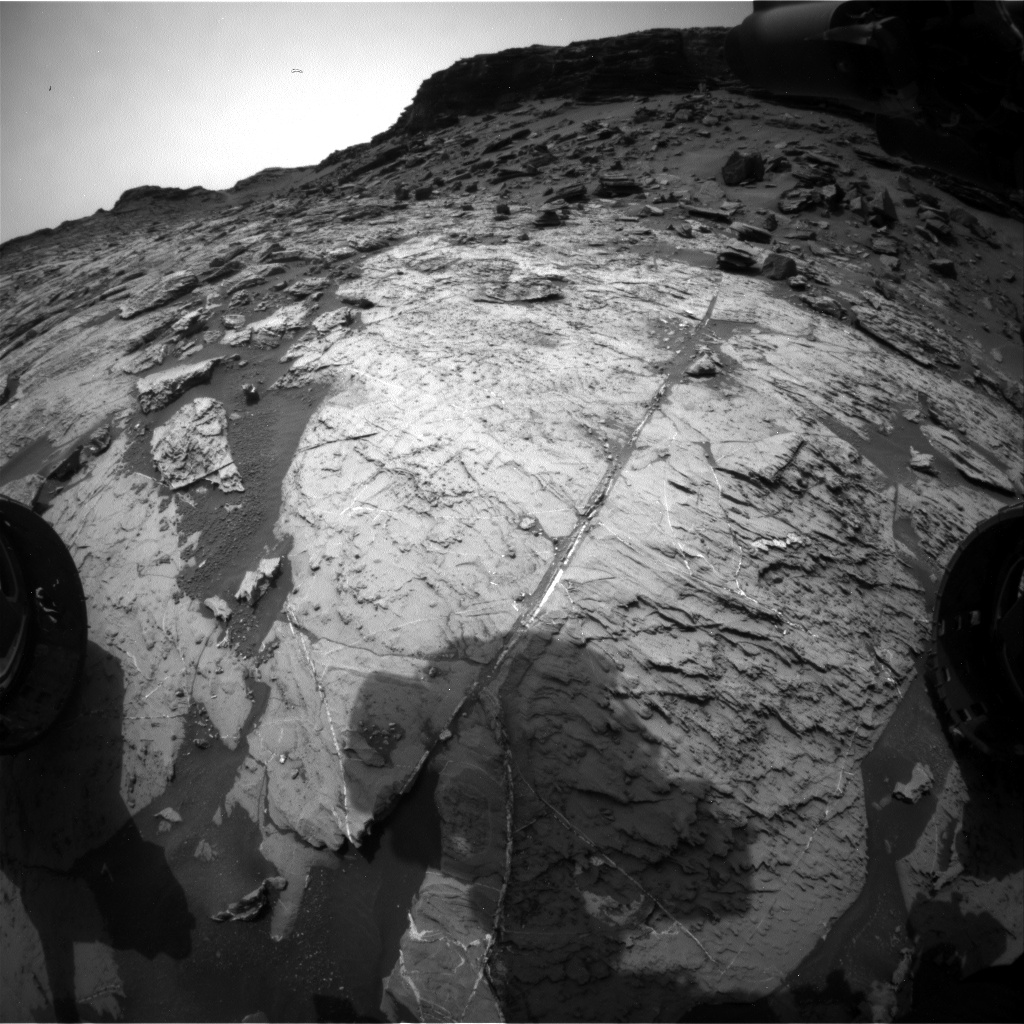

In [11]:
imgright

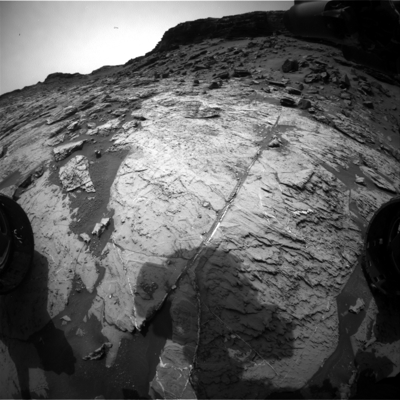

In [12]:
imgright_resized = imgright.resize((400,400))
imgright_resized

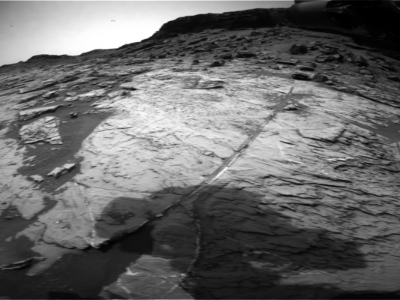

In [13]:
imgright_dewarped = imgright_resized.transform((400,300),
                                               PIL.Image.QUAD,
                                               data=(0,0,100,400,300,400,400,0),
                                               resample=PIL.Image.BILINEAR)
imgright_dewarped

In [14]:
imgurl_left = re.sub('FRB','FLB',imgurl)
imgleft = PIL.Image.open(io.BytesIO(requests.get(imgurl_left).content))

In [15]:
imgleft_resized = imgleft.resize((400,400))
imgleft_dewarped = imgleft_resized.transform((400,300),
                                               PIL.Image.QUAD,
                                               data=(0,0,100,400,300,400,400,0),
                                               resample=PIL.Image.BILINEAR)

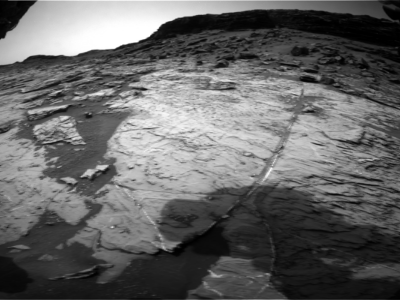

In [16]:
imgleft_dewarped

In [17]:
imgleft_red = PIL.ImageOps.colorize(imgleft_dewarped,(0,0,0),(255,0,0))

In [18]:
imgright_cyan = PIL.ImageOps.colorize(imgright_dewarped,(0,0,0),(0,255,255))

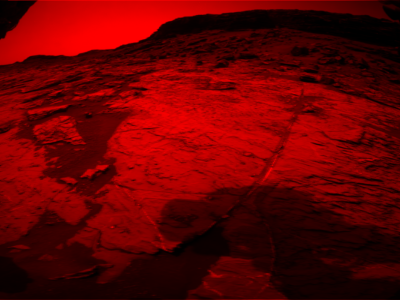

In [19]:
imgleft_red

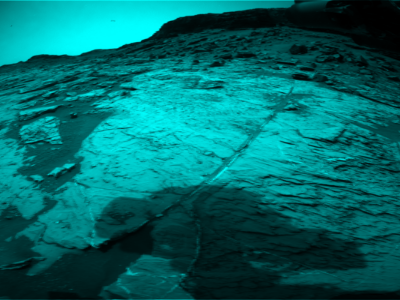

In [20]:
imgright_cyan

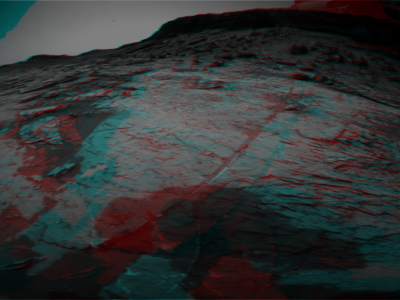

In [21]:
blend = PIL.Image.blend(imgleft_red,imgright_cyan,0.5)
blend

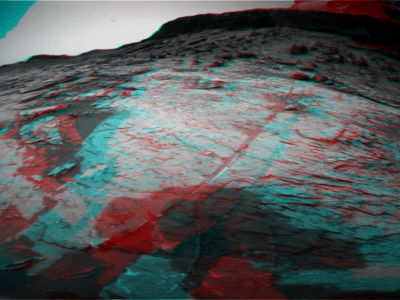

In [22]:
brightness = PIL.ImageEnhance.Brightness(blend)
enhanced = brightness.enhance(1.75)
enhanced